In [3091]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import display, HTML

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 9

def header(text, level, inline=True):
    tag = 'h' + str(level)
    if inline:
        return '<' + tag + ' style="display:inline-block">' + text + '&nbsp;&nbsp;</' + tag + '>'
    else:
        return '<' + tag + '>' + text + '</' + tag + '>'

In [3092]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3093]:
def show_results(reward_log):
    with open(reward_log, 'r') as f:
        scores = [float(score.strip()) for score in f.readlines()]
        score_array = np.array(scores)
        
        x_array = np.array(range(len(scores)))
        sns.regplot(x_array, score_array, fit_reg=False)
        sns.regplot(x_array[-30000:], score_array[-30000:], scatter=False)
        
        coefficients = np.polyfit(x_array[-30000:], score_array[-30000:], 1)
        slope = coefficients[0]
        display(HTML(header(reward_log, 1, False)))
        display(HTML(header('Score:', 2) + header(str(np.mean(score_array[-1000:])), 2) +
                     header('Slope:', 2) + header(str(slope), 2)))

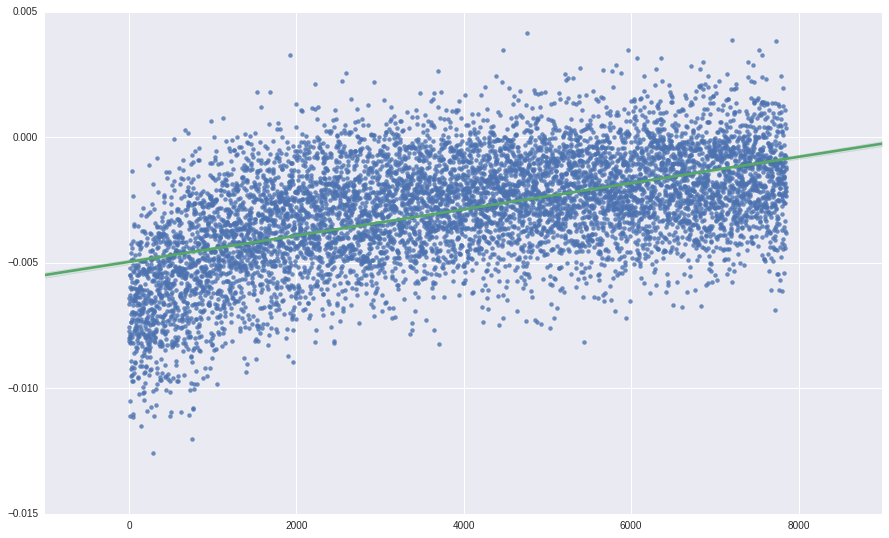

In [3094]:
show_results('DQN/rewards.log')

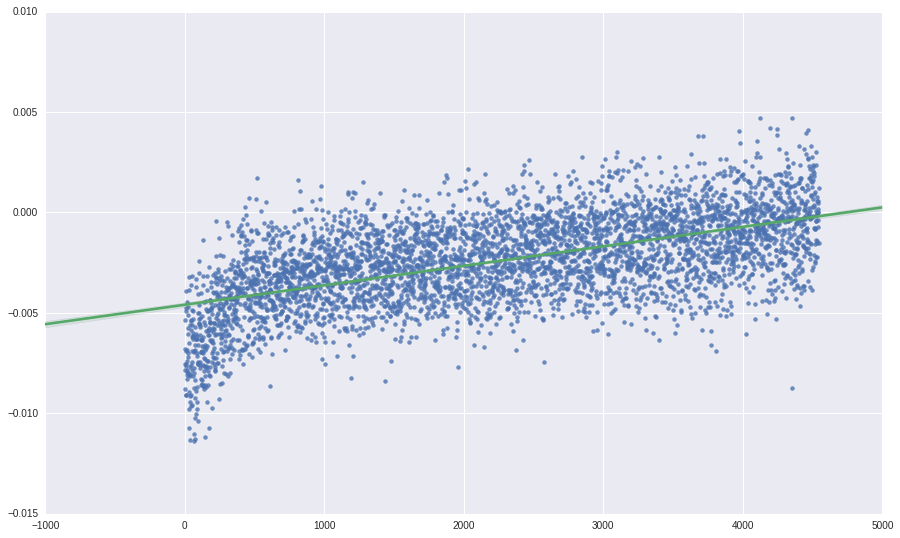

In [3095]:
show_results('ActorCritic/rewards.log')